In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp

%matplotlib inline
plt.rcParams['figure.figsize'] = 20,16

In [2]:
import pandas as pd
data_set = r'C:\Users\renb\Documents\21_Github\tsaysis_tsod\NAB\data'
from pathlib import Path
folder_path = Path(data_set)



2.7151515151515153

In [176]:
window_size = 297
data_folder_name = 'artificialNoAnomaly'
data_list = list(folder_path.glob(f'{data_folder_name}/art_daily_small_noise.csv'))
query= pd.read_csv(data_list[0])['value'].values
#profile = mp.compute(query,window_size )
snippets_size = window_size*5
snippets = mp.discover.snippets(query, snippet_size=snippets_size,window_size = window_size,num_snippets= 3)

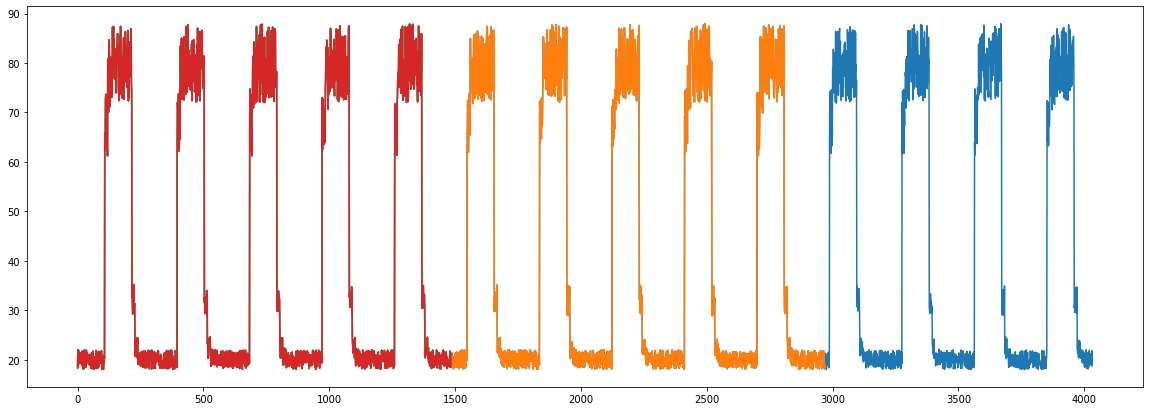

In [177]:
plt.figure(figsize=(20, 7))
plt.plot(np.arange(query.shape[0]), query)
for i in range(len(snippets)):
    plt.plot(np.arange(snippets[i]['index'],snippets[i]['index']+snippets_size), snippets[i]['snippet'])


C:\Users\renb\Miniconda3\envs\iindustry_comp\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


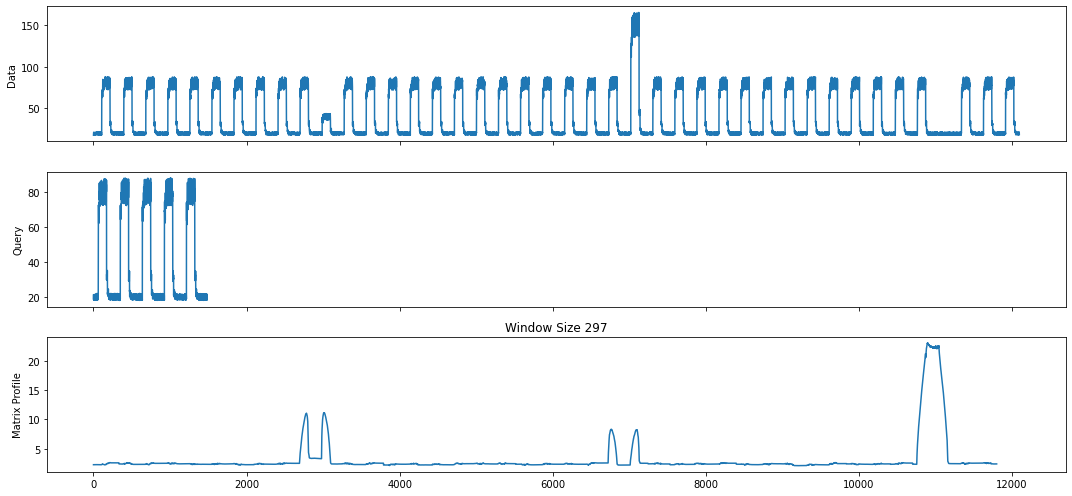

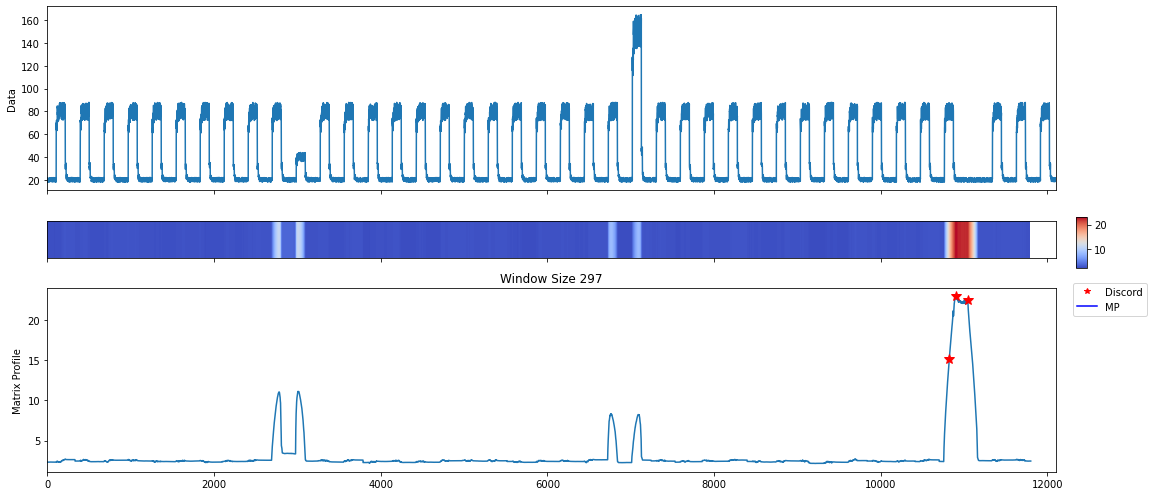

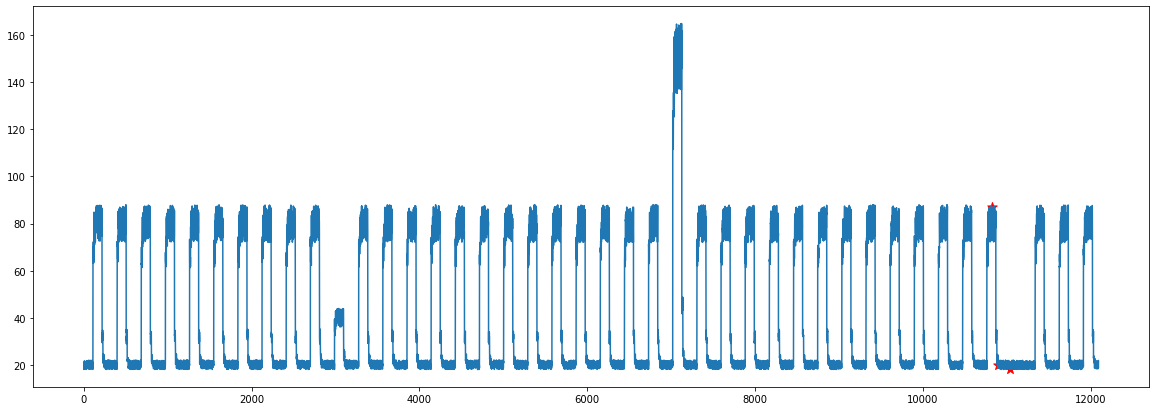

In [178]:
ts = np.array([])
data_folder_name = 'artificialWithAnomaly'
data_list = list(folder_path.glob(f'{data_folder_name}/*.csv'))
for f in data_list[1:-2]:
    ts= np.append(ts,pd.read_csv(f)['value'].values)
ts2= snippets[0]['snippet']
profile = mp.compute(ts,query=ts2,windows = window_size)
profile = mp.discover.discords(profile, k=3)
figures = mp.visualize(profile)
profile['discords']
plt.figure(figsize=(20, 7))
plt.plot(np.arange(ts.shape[0]), ts)
plt.scatter(sorted(profile['discords']), ts[sorted(profile['discords'])],c='r', marker='*',s=100)

C:\Users\renb\Miniconda3\envs\iindustry_comp\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


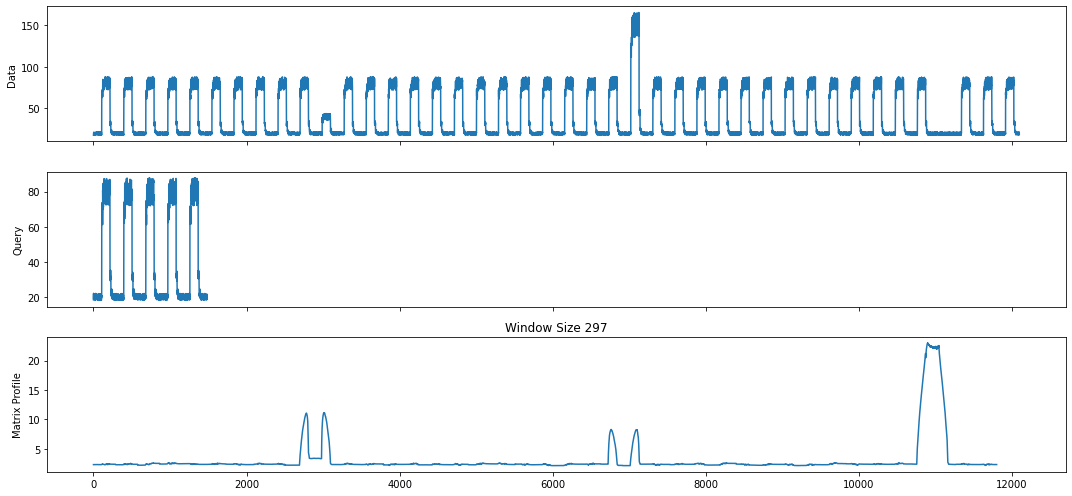

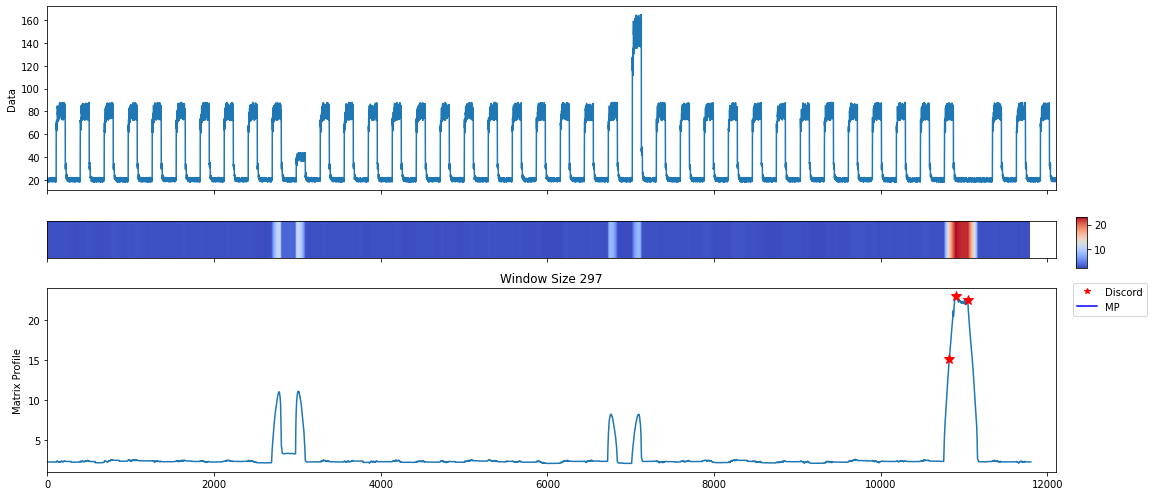

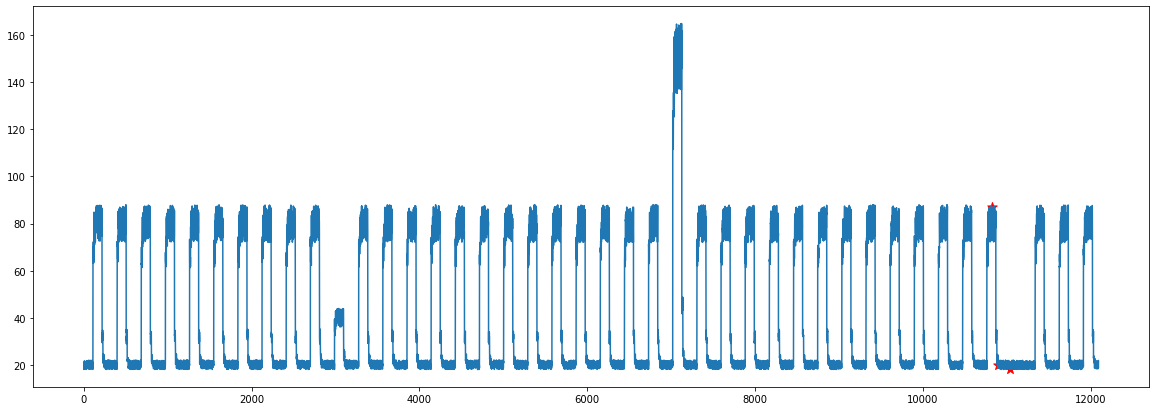

In [180]:
ts = np.array([])
data_folder_name = 'artificialWithAnomaly'
data_list = list(folder_path.glob(f'{data_folder_name}/*.csv'))
for f in data_list[1:-2]:
    ts= np.append(ts,pd.read_csv(f)['value'].values)

profile_df = pd.DataFrame()
for i in range(len(snippets)):
    ts2= snippets[i]['snippet']
    profile = mp.compute(ts,query=ts2,windows = window_size)
    profile_df = pd.concat([profile_df,pd.DataFrame(profile['mp'],columns = [i])],axis=1)
profile['mp'] = profile_df.min(axis=1).values
profile = mp.discover.discords(profile, k=3)
figures = mp.visualize(profile)
profile['discords']
plt.figure(figsize=(20, 7))
plt.plot(np.arange(ts.shape[0]), ts)
plt.scatter(sorted(profile['discords']), ts[sorted(profile['discords'])],c='r', marker='*',s=100)

<AxesSubplot:>

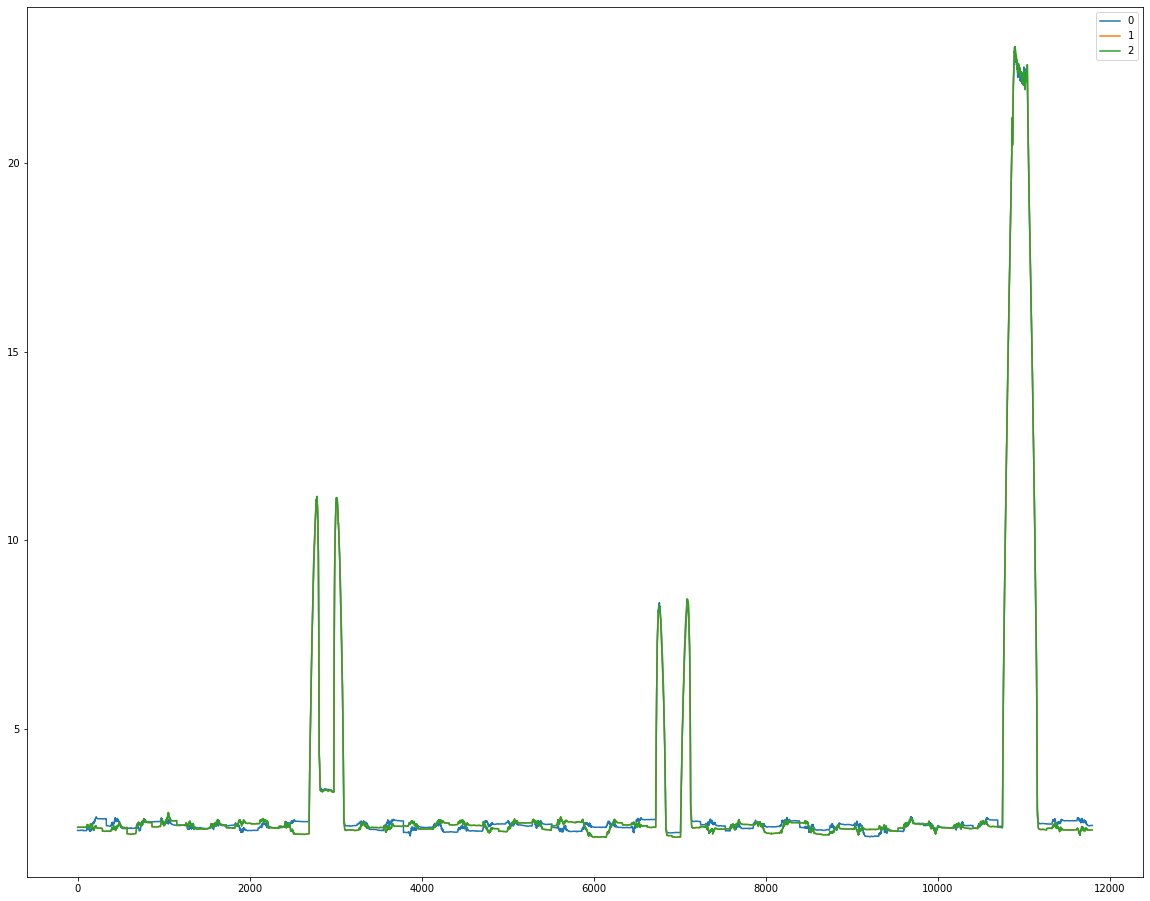

In [181]:
profile_df.plot()